# PREDICTING REAL STATE HOUSE PRICE PROJECT 2 F

# import libraries


In [1]:
import pandas as pd
import numpy as np 
import sklearn
from scipy import stats
import seaborn as sns
from scipy.stats import normaltest
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import jarque_bera
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Import Dataset


In [2]:
path="C:/Users/mojde/OneDrive/Desktop/python project 2 xi/dataset/kc_house_data.csv"
df=pd.read_csv(path)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df.isna().sum()/len(df)*100

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

# df.info()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Clean dataset 

# Drop unnecessary columns


In [6]:
df.drop(['date','view','sqft_above','sqft_basement','lat','long','zipcode','sqft_living15','sqft_lot15','yr_renovated','id','sqft_lot','yr_built'],axis=1,inplace=True)

In [7]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade
0,221900.0,3,1.00,1180,1.0,NaN,3,7
1,538000.0,3,2.25,2570,2.0,0.0,3,7
2,180000.0,2,1.00,770,1.0,0.0,3,6
3,604000.0,4,3.00,1960,1.0,0.0,5,7
4,510000.0,3,2.00,1680,1.0,0.0,3,8


# finding any Null or duplicated value

In [8]:
#df.isnull().sum()
#THERE wasnt any Null value based on this code

In [9]:
#finding duplications and remove them
repeated=df.duplicated().sum()
repeated

83

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df= df.dropna()

# check linearity of independent variables with scatter plot

In [12]:
independent_variables=['bedrooms','bathrooms','sqft_living','floors','condition','grade','waterfront']

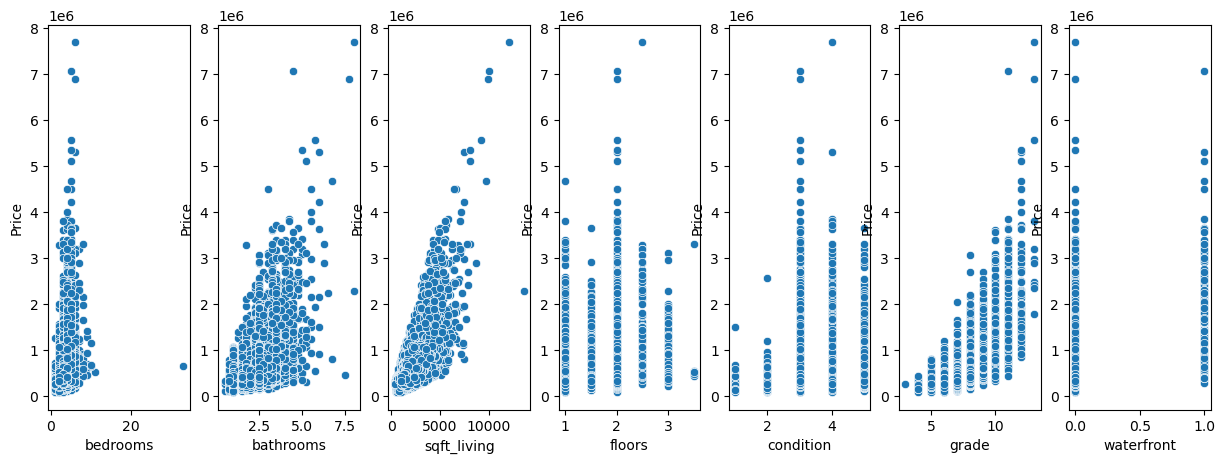

In [13]:


plt.figure(figsize=(15,5))
for i, feature in enumerate(independent_variables):
    plt.subplot(1, len(independent_variables), i + 1)
    sns.scatterplot(x=feature, y='price', data=df)
    plt.xlabel(feature)
    plt.ylabel('Price')

# Build the first model

In [14]:
X = sm.add_constant(df[independent_variables])
y = df['price']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     4006.
Date:                Thu, 28 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:03:27   Log-Likelihood:            -2.6404e+05
No. Observations:               19138   AIC:                         5.281e+05
Df Residuals:                   19130   BIC:                         5.282e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.302e+05   1.89e+04    -38.733      

# Check model normality : Q-Q plot and  Homoscedasticity

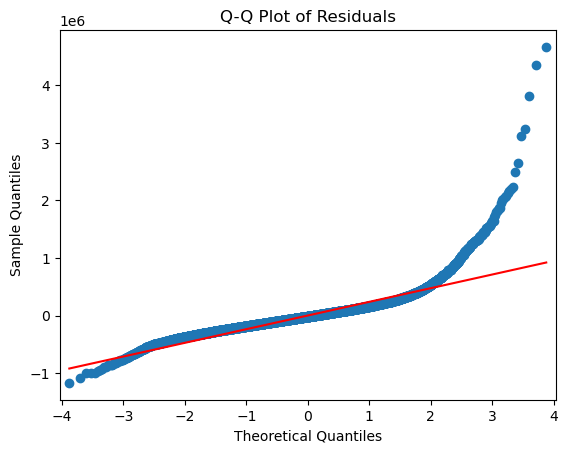

In [15]:
residuals = model.resid

# Q-Q plot of residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

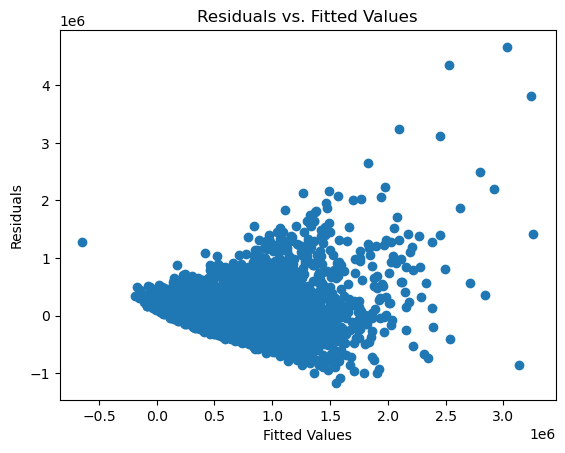

In [16]:
plt.scatter(model.fittedvalues, residuals)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Brief explanation about this basic  model 

In [17]:
#these models are signifcant based on p-value and independent variables has positive(coeff>0) ,so we reject the H0 which means we reject the normal distribution

#these models have highlyskewed base on skew>0,and based on  high kurtosis which means  they all have heavy tail comparing to the normal distribution

#based on what we have all models  violate the assumption of normality

#these dependent variables have positive effect on price base on coeff>0 :bathrooms,sqft_living,floor,condition,waterfront,grade

#based on the Q-Q plot and Homoscedasticity graph it is considered that the model violate the normality ,thus it needs to be improved 

# Detecting Outliers using Boxplot

In [18]:
df = pd.DataFrame(df)


In [19]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade
count,1.913800e+04,19138.000000,19138.000000,19138.000000,19138.000000,19138.000000,19138.000000,19138.000000
mean,5.422244e+05,3.375536,2.117463,2083.993991,1.493965,0.007629,3.410962,7.661354
std,3.728322e+05,0.929000,0.769397,923.264705,0.539405,0.087011,0.650940,1.177204
min,7.800000e+04,1.000000,0.500000,370.000000,1.000000,0.000000,1.000000,3.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,1.000000,0.000000,3.000000,7.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,1.500000,0.000000,3.000000,7.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,4.000000,8.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,5.000000,13.000000


In [20]:
#as we see we have 3 columns with outliers:grade,sqft_living,bedrooms

<Axes: xlabel='grade'>

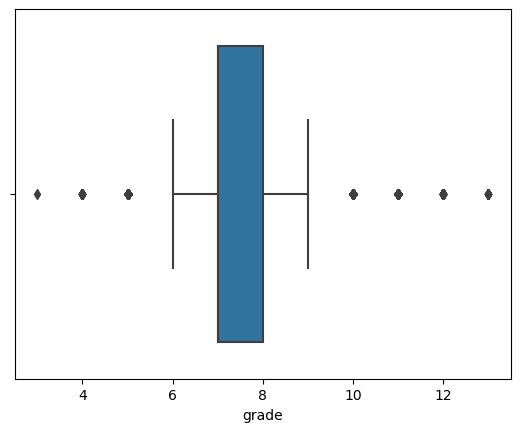

In [21]:
sns.boxplot(x='grade',data=df)

<Axes: xlabel='sqft_living'>

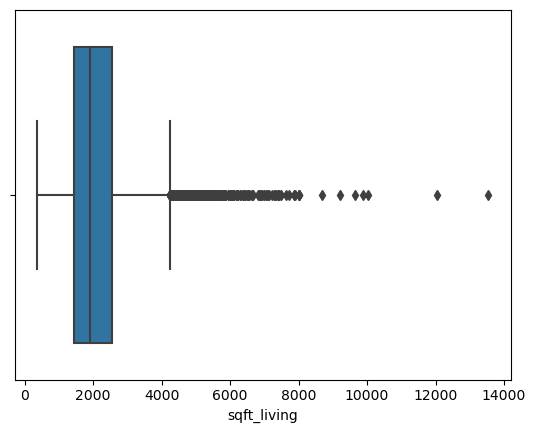

In [22]:
sns.boxplot(x='sqft_living',data=df)

<Axes: xlabel='bedrooms'>

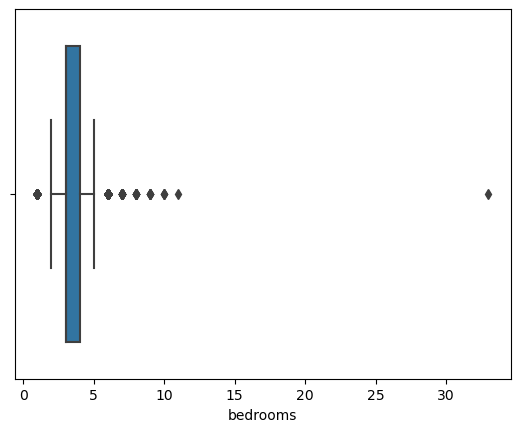

In [23]:
sns.boxplot(x='bedrooms',data=df)

# Detecting Outliers By IQR method 

In [24]:
q1=df['grade'].quantile(0.25)
q3=df['grade'].quantile(0.75)
IQR1=q3-q1
upper_limit_grade=q3+(1.5*IQR1)
lower_limit_grade=q1-(1.5*IQR1)
lower_limit_grade,upper_limit_grade

(5.5, 9.5)

In [25]:
q1=df['sqft_living'].quantile(0.25)
q3=df['sqft_living'].quantile(0.75)
IQR2=q3-q1


upper_limit_sqft_living=q3+(1.5*IQR2)
lower_limit_sqft_living=q1-(1.5*IQR2)
lower_limit_sqft_living,upper_limit_sqft_living

(-250.0, 4230.0)

In [26]:
q1=df['bedrooms'].quantile(0.25)
q3=df['bedrooms'].quantile(0.75)
IQR3=q3-q1

upper_limit_bedrooms=q3+(1.5*IQR3)
lower_limit_bedrooms=q1-(1.5*IQR3)
lower_limit_bedrooms,upper_limit_bedrooms

(1.5, 5.5)

# Removing Outliers :


In [27]:
df1=df.loc[(df['grade']<upper_limit_grade) & (df['grade'] > lower_limit_grade)]

In [28]:
print('before removing outliers',len(df))
print('after removing outliers',len(df1))
print('number of outliers',len(df)-len(df1))

before removing outliers 19138
after removing outliers 17431
number of outliers 1707


In [29]:
df2=df1.loc[(df1['sqft_living']<upper_limit_sqft_living) & (df1['sqft_living'] > lower_limit_sqft_living)]
print('before removing outliers',len(df1))
print('after removing outliers',len(df2))
print('number of outliers',len(df1)-len(df2))

before removing outliers 17431
after removing outliers 17340
number of outliers 91


In [30]:
df3=df2.loc[(df2['bedrooms']<upper_limit_bedrooms) & (df2['bedrooms'] > lower_limit_bedrooms)]
print('before removing outliers',len(df2))
print('after removing outliers',len(df3))
print('number of outliers',len(df2)-len(df3))

before removing outliers 17340
after removing outliers 16996
number of outliers 344


In [31]:
df3.shape

(16996, 8)

In [32]:
df.shape , df3.shape

((19138, 8), (16996, 8))

In [33]:
len(df)-len(df3)
#we remove 2145 rows as they contain outliers

2142

# improving  model 

In [34]:
print(df3['bedrooms'].value_counts())
print(df3['bathrooms'].value_counts())
print(df3['floors'].value_counts())
print(df3['waterfront'].value_counts())
print(df3['condition'].value_counts())
print(df3['grade'].value_counts())

bedrooms
3    8284
4    5266
2    2306
5    1140
Name: count, dtype: int64
bathrooms
2.50    4354
1.00    3113
1.75    2679
2.25    1692
2.00    1671
1.50    1250
2.75     897
3.00     524
3.50     369
3.25     317
3.75      47
0.75      27
4.00      23
4.25      13
4.50       9
1.25       6
4.75       3
0.50       2
Name: count, dtype: int64
floors
1.0    8886
2.0    5970
1.5    1554
3.0     489
2.5      92
3.5       5
Name: count, dtype: int64
waterfront
0.0    16919
1.0       77
Name: count, dtype: int64
condition
3    10829
4     4640
5     1385
2      128
1       14
Name: count, dtype: int64
grade
7    7786
8    5269
9    2213
6    1728
Name: count, dtype: int64


In [35]:
# as we noticed we have some categorical variable so to improve our model we need to make dummies for them :
#condition, waterfront , floors, grade, bathrooms and bedrooms

In [36]:
df3.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade
1,538000.0,3,2.25,2570,2.0,0.0,3,7
2,180000.0,2,1.00,770,1.0,0.0,3,6
3,604000.0,4,3.00,1960,1.0,0.0,5,7
4,510000.0,3,2.00,1680,1.0,0.0,3,8
6,257500.0,3,2.25,1715,2.0,0.0,3,7


# Grouping categorical data for creating dummies

In [37]:
#df4= df3.copy()
#df4['condition']=pd.cut(df3['condition'], bins=[0, 2, 3, 5], labels=['Low','Medium','High'])
#df4.head()


In [38]:
#df5=df4.copy()
#df5['grade'] = pd.cut(df5['grade'], bins=[0, 5, 7, 9], labels=['Fair', 'Good', 'Excelent'])

#df5.head()


In [39]:
#df6=df5.copy()
#df6['bedrooms'] = pd.cut(df5['bedrooms'], bins=[0, 2, 4, 5], labels=['small', 'medium', 'large'])

#df6.head()

In [40]:
df4= df3.copy()
df4['floors']=pd.cut(df3['floors'], bins=[0,1.5,2.5,3.5], labels=['L1','L2','L3'])
df4.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade
1,538000.0,3,2.25,2570,L2,0.0,3,7
2,180000.0,2,1.00,770,L1,0.0,3,6
3,604000.0,4,3.00,1960,L1,0.0,5,7
4,510000.0,3,2.00,1680,L1,0.0,3,8
6,257500.0,3,2.25,1715,L2,0.0,3,7


In [41]:
df5=df4.copy()
df5['bathrooms'] = pd.cut(df4['bathrooms'], bins=[0, 2, 4, 5], labels=['Small', 'Medium', 'Large'])
df5.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade
1,538000.0,3,Medium,2570,L2,0.0,3,7
2,180000.0,2,Small,770,L1,0.0,3,6
3,604000.0,4,Medium,1960,L1,0.0,5,7
4,510000.0,3,Small,1680,L1,0.0,3,8
6,257500.0,3,Medium,1715,L2,0.0,3,7


In [42]:
df5.shape

(16996, 8)

# Create Dummies for each group 

In [43]:
condition_dummies = pd.get_dummies(df5['condition'], prefix="con", drop_first=True)
bedrooms_dummies = pd.get_dummies(df5['bedrooms'], prefix="bed", drop_first=True)
floors_dummies = pd.get_dummies(df5['floors'], prefix="floor", drop_first=True)
bathrooms_dummies = pd.get_dummies(df5['bathrooms'], prefix="bath", drop_first=True)
waterfront_dummies = pd.get_dummies(df5['waterfront'], prefix="water", drop_first=True)
grade_dummies = pd.get_dummies(df5['grade'], prefix="grade", drop_first=True)
df5.drop(columns=['condition', 'bedrooms', 'floors', 'bathrooms', 'waterfront', 'grade'], inplace=True)

In [44]:
df6 = pd.concat([df5, condition_dummies, bedrooms_dummies, floors_dummies, 
                 bathrooms_dummies, waterfront_dummies, grade_dummies], axis=1)

In [45]:
df6.head()

,price,sqft_living,con_2,con_3,con_4,con_5,bed_3,bed_4,bed_5,floor_L2,floor_L3,bath_Medium,bath_Large,water_1.0,grade_7,grade_8,grade_9
1,538000.0,2570,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False
2,180000.0,770,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,604000.0,1960,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False
4,510000.0,1680,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False
6,257500.0,1715,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False


In [46]:
#changing dummy columns type to integer
#dummy_columns = df9.columns[df9.columns.str.startswith('con_') | df9.columns.str.startswith('bed_') | df9.columns.str.startswith('floor_') | df9.columns.str.startswith('bath_') | df9.columns.str.startswith('water_') | df9.columns.str.startswith('grade_') ]
#df9[dummy_columns] = df9[dummy_columns].astype(int)

In [47]:
df6.shape

(16996, 17)

# Checking Multicollinearity:

In [48]:
bool_columns = ['con_2', 'con_3', 'con_4', 'con_5', 'bed_3',
                'bed_4', 'bed_5', 'floor_L2', 'floor_L3', 'bath_Medium','bath_Large','water_1.0','grade_7','grade_8','grade_9', ]

df6[bool_columns] = df6[bool_columns].astype(int)

In [49]:
data_pred = df6.iloc[:, np.r_[0, 2:17]]
data_pred.head()

,price,con_2,con_3,con_4,con_5,bed_3,bed_4,bed_5,floor_L2,floor_L3,bath_Medium,bath_Large,water_1.0,grade_7,grade_8,grade_9
1,538000.0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
2,180000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0
4,510000.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
6,257500.0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0


In [50]:
correlation = data_pred.corr()
correlation

,price,con_2,con_3,con_4,con_5,bed_3,bed_4,bed_5,floor_L2,floor_L3,bath_Medium,bath_Large,water_1.0,grade_7,grade_8,grade_9
price,1.000000,-0.059694,-0.052915,0.006874,0.102054,-0.159560,0.190212,0.143484,0.182206,0.026391,0.299368,0.060163,0.171932,-0.309568,0.162097,0.465068
con_2,-0.059694,1.000000,-0.115433,-0.053382,-0.025947,-0.008698,-0.015687,-0.020637,-0.043551,-0.015072,-0.059823,-0.003343,-0.005877,0.010056,-0.039262,-0.031682
con_3,-0.052915,-0.115433,1.000000,-0.812040,-0.394700,-0.004199,0.008407,-0.020717,0.301592,0.124741,0.213697,0.003420,-0.021976,-0.111220,0.098122,0.115989
con_4,0.006874,-0.053382,-0.812040,1.000000,-0.182528,0.017286,-0.018749,0.015191,-0.234617,-0.102096,-0.170439,-0.006290,0.017657,0.092345,-0.070094,-0.088363
con_5,0.102054,-0.025947,-0.394700,-0.182528,1.000000,-0.017667,0.021800,0.019001,-0.132440,-0.047695,-0.076640,0.005403,0.011930,0.042957,-0.044346,-0.048783
bed_3,-0.159560,-0.008698,-0.004199,0.017286,-0.017667,1.000000,-0.653360,-0.261467,-0.099197,0.071626,-0.132369,-0.034355,-0.014952,0.133256,-0.025746,-0.128592
bed_4,0.190212,-0.015687,0.008407,-0.018749,0.021800,-0.653360,1.000000,-0.179658,0.194902,-0.084874,0.280882,0.017443,-0.011098,-0.124466,0.086786,0.188787
bed_5,0.143484,-0.020637,-0.020717,0.015191,0.019001,-0.261467,-0.179658,1.000000,0.033583,-0.040792,0.133877,0.057218,0.002925,-0.038353,0.029285,0.071684
floor_L2,0.182206,-0.043551,0.301592,-0.234617,-0.132440,-0.099197,0.194902,0.033583,1.000000,-0.128829,0.564841,0.029111,-0.002677,-0.270451,0.202289,0.325818
floor_L3,0.026391,-0.015072,0.124741,-0.102096,-0.047695,0.071626,-0.084874,-0.040792,-0.128829,1.000000,0.096012,0.011637,-0.001242,-0.095817,0.138471,0.003828


In [51]:
#data_pred = pd.get_dummies(data_pred, columns=['bedrooms', 'bathrooms', 'floors', 'condition'])
#data_pred['waterfront'] = pd.to_numeric(data_pred['waterfront'])
#data_pred['grade_Good'] = pd.to_numeric(data_pred['grade_Good'])
#data_pred['grade_Excelent'] = pd.to_numeric(data_pred['grade_Excelent'])
#correlation=data_pred.corr()
#correlation

In [52]:
abs(correlation) > 0.75

,price,con_2,con_3,con_4,con_5,bed_3,bed_4,bed_5,floor_L2,floor_L3,bath_Medium,bath_Large,water_1.0,grade_7,grade_8,grade_9
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
con_2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
con_3,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
con_4,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
con_5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
bed_3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
bed_4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
bed_5,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
floor_L2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
floor_L3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [53]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16996 entries, 1 to 21596
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        16996 non-null  float64
 1   sqft_living  16996 non-null  int64  
 2   con_2        16996 non-null  int32  
 3   con_3        16996 non-null  int32  
 4   con_4        16996 non-null  int32  
 5   con_5        16996 non-null  int32  
 6   bed_3        16996 non-null  int32  
 7   bed_4        16996 non-null  int32  
 8   bed_5        16996 non-null  int32  
 9   floor_L2     16996 non-null  int32  
 10  floor_L3     16996 non-null  int32  
 11  bath_Medium  16996 non-null  int32  
 12  bath_Large   16996 non-null  int32  
 13  water_1.0    16996 non-null  int32  
 14  grade_7      16996 non-null  int32  
 15  grade_8      16996 non-null  int32  
 16  grade_9      16996 non-null  int32  
dtypes: float64(1), int32(15), int64(1)
memory usage: 1.4 MB


# get the highest correlation pairs

In [54]:
df7=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

In [55]:
df7['pairs'] = list(zip(df7.level_0, df7.level_1))

In [56]:
df7.set_index(['pairs'], inplace = True)

In [57]:
df7.drop(columns=['level_1', 'level_0'], inplace = True)


In [58]:
df7.columns = ['cc']

In [59]:
df7.drop_duplicates(inplace=True)

In [60]:
df7[(df7.cc>.75) & (df7.cc <1)]

,cc
pairs,
"(con_4, con_3)",0.81204


In [61]:
df6.drop(columns=['con_4'],inplace=True) 

# Build second model 

In [62]:
df6.dtypes

price          float64
sqft_living      int64
con_2            int32
con_3            int32
con_5            int32
bed_3            int32
bed_4            int32
bed_5            int32
floor_L2         int32
floor_L3         int32
bath_Medium      int32
bath_Large       int32
water_1.0        int32
grade_7          int32
grade_8          int32
grade_9          int32
dtype: object

In [63]:
#df6_numeric = df6.apply(pd.to_numeric, errors='coerce')

df6.dropna(inplace=True)
X = sm.add_constant(df6.drop(columns=['price']))
y = df6['price']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     928.7
Date:                Thu, 28 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:03:28   Log-Likelihood:            -2.2935e+05
No. Observations:               16996   AIC:                         4.587e+05
Df Residuals:                   16980   BIC:                         4.589e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.798e+05   6258.712     28.732      0.000    1.68e+05    1.92e+05
sqft_living   143.4248      3.292     43.562      0.000     136.971     149.878
con_2       -7.262e+04   1.58e+04     -4.601      0.000   -1.04e+05   -4.17e+04
con_3        -4.25e+04   3251.951    -13.069      0.000   -4.89e+04   -3.61e+04
con_5        7.454e+04   5383.100     13.847      0.000     6.4e+04    8.51e+04
bed_3       -6.189e+04   4431.415    -13.966      0.000   -7.06e+04   -5.32e+04
bed_4       -7.341e+04   5286.586    -13.885      0.000   -8.38e+04    -6.3e+04
bed_5       -6.545e+04   7442.464     -8.795      0.000      -8e+04   -5.09e+04
floor_L2      -3.6e+04   3728.111     -9.656      0.000   -4.33e+04   -2.87e+04
floor_L3     4.424e+04   8669.909      5.103      0.000    2.72e+04    6.12e+04
bath_Medium -2.391e+04   3917.602     -6.103      0.000   -3.16e+04   -1.62e+04
bath_Large   4.619e+04   3.56e+04      1.298      0.194   -2.35e+04    1.16e+05
water_1.0    4.785e+05   2.01e+04     23.762      0.000    4.39e+05    5.18e+05
grade_7      6.875e+04   4962.376     13.855      0.000     5.9e+04    7.85e+04
grade_8      1.645e+05   5850.427     28.112      0.000    1.53e+05    1.76e+05
grade_9      3.225e+05   7438.823     43.351      0.000    3.08e+05    3.37e+05
==============================================================================
Omnibus:                     5595.546   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34666.566
Skew:                           1.442   Prob(JB):                         0.00
Kurtosis:                       9.375   Cond. No.                     5.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
#since the bath_large has p>0.05 we can drop it 

In [65]:
df6.drop(columns=['bath_Large'], inplace=True)

In [66]:
df6.head()

,price,sqft_living,con_2,con_3,con_5,bed_3,bed_4,bed_5,floor_L2,floor_L3,bath_Medium,water_1.0,grade_7,grade_8,grade_9
1,538000.0,2570,0,1,0,1,0,0,1,0,1,0,1,0,0
2,180000.0,770,0,1,0,0,0,0,0,0,0,0,0,0,0
3,604000.0,1960,0,0,1,0,1,0,0,0,1,0,1,0,0
4,510000.0,1680,0,1,0,1,0,0,0,0,0,0,0,1,0
6,257500.0,1715,0,1,0,1,0,0,1,0,1,0,1,0,0


# Check model normality : Q-Q plot and  Homoscedasticity

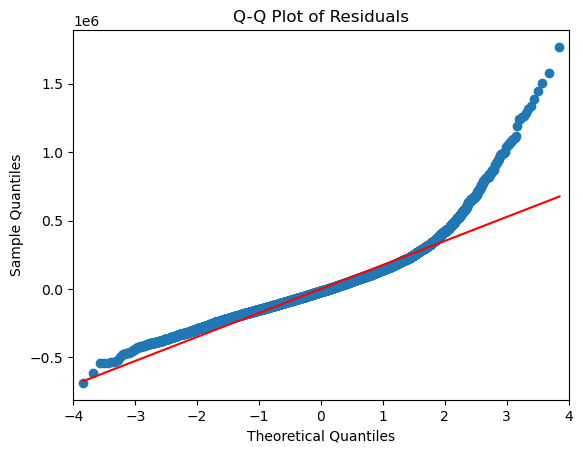

In [67]:
residuals = model.resid


sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

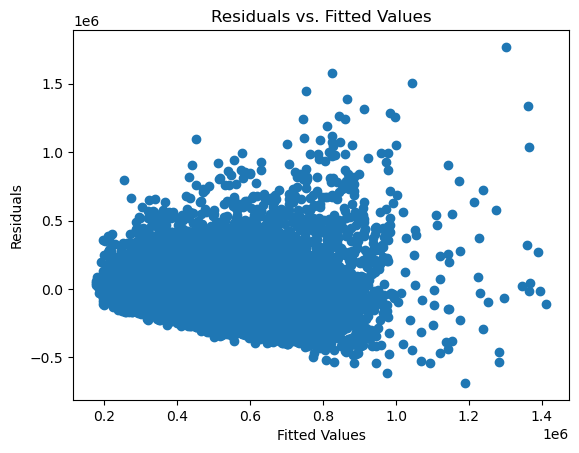

In [68]:
plt.scatter(model.fittedvalues, residuals)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Brief explenation about the second model

In [69]:
#these models are signifcant based on p-value (except for bath_large),and independent variables has positive(coeff>0) ,so we reject the H0 which means we reject the normal distribution

#these model has improvement on skeweness comparing to the first model,also it has improvement in kurtosis which means it still has  heavy tail  comparing to the normal distribution but has improvement comparing to the first model

#based on what we have the model still  violate the assumption of normality

#these dependent variables have positive effect on price base on coeff>0 :sqft_living,floor_l2,floor_l3,bath_medium,bath_large,water_1,garde_good,grade_excelent

#based on the Q-Q plot and Homoscedasticity graph it is considered that the model violate the normality ,thus it needs more improvement

In [70]:
df6.head()

,price,sqft_living,con_2,con_3,con_5,bed_3,bed_4,bed_5,floor_L2,floor_L3,bath_Medium,water_1.0,grade_7,grade_8,grade_9
1,538000.0,2570,0,1,0,1,0,0,1,0,1,0,1,0,0
2,180000.0,770,0,1,0,0,0,0,0,0,0,0,0,0,0
3,604000.0,1960,0,0,1,0,1,0,0,0,1,0,1,0,0
4,510000.0,1680,0,1,0,1,0,0,0,0,0,0,0,1,0
6,257500.0,1715,0,1,0,1,0,0,1,0,1,0,1,0,0


# Doing log Transformation for non-normal independent variable:


#we have to check the normality of each independent variable first and do the log transformation for each of the not normal one

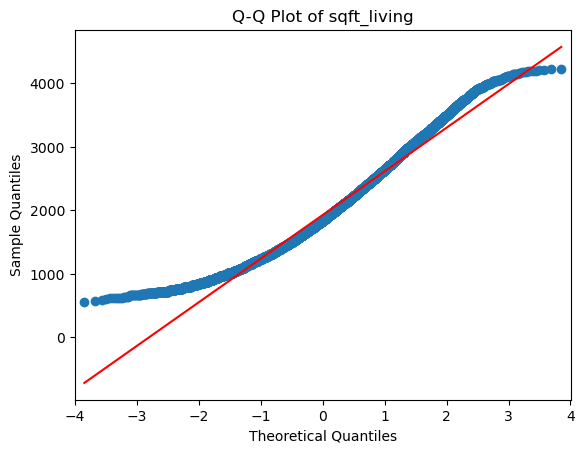

In [71]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

qqplot(df6['sqft_living'], line='s')
plt.title('Q-Q Plot of sqft_living')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


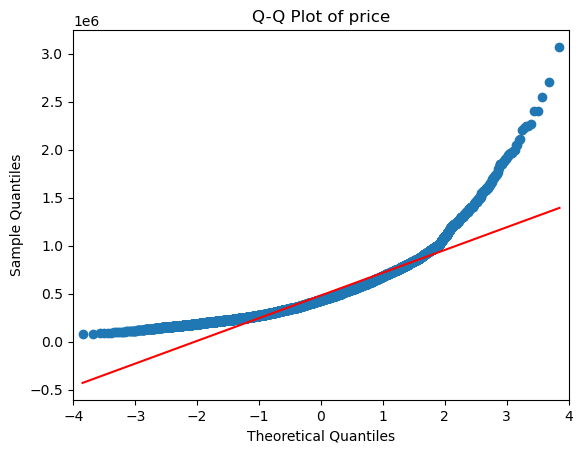

In [72]:
qqplot(df6['price'], line='s')
plt.title('Q-Q Plot of price')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


# do arque-Bera test to make sure or distribution is not normal

In [73]:
jb_stat, jb_p_value = jarque_bera(df6['sqft_living'])
print(f"Jarque-Bera test statistic: {jb_stat}")
print(f"P-value: {jb_p_value}")

Jarque-Bera test statistic: 957.4776159846789
P-value: 1.2200494008459412e-208


In [74]:
# as we conclude (from p>0.05 which means we reject H0 as normal distribution ,and fromJarque-Bera test statistic we conclude the distribution of sqft_living is significantly far from normal one 

In [75]:
jb_stat, jb_p_value = jarque_bera(df6['price'])
print(f"Jarque-Bera test statistic: {jb_stat}")
print(f"P-value: {jb_p_value}")

Jarque-Bera test statistic: 48245.297279294144
P-value: 0.0


In [76]:
#based on non normal distribution for sqft_living and prce we need to do log transformation for both of this column

# do log transformation for continous columns(price,sqft_living)

In [77]:
df6['sqft_living'] = df6['sqft_living'].apply(lambda x: np.log(x))

In [78]:
df6['price']=df6['price'].apply(lambda x: np.log(x))

# create the third model

In [79]:
df6.dropna(inplace=True)
X = sm.add_constant(df6.drop(columns=['price']))
y = df6['price']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     994.1
Date:                Thu, 28 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:03:29   Log-Likelihood:                -5484.4
No. Observations:               16996   AIC:                         1.100e+04
Df Residuals:                   16981   BIC:                         1.111e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.0545      0.083    108.844      0.000       8.891       9.218
sqft_living     0.5129      0.012     42.841      0.000       0.489       0.536
con_2          -0.2114      0.030     -7.034      0.000      -0.270      -0.152
con_3          -0.0696      0.006    -11.244      0.000      -0.082      -0.057
con_5           0.1376      0.010     13.427      0.000       0.118       0.158
bed_3          -0.1699      0.009    -19.637      0.000      -0.187      -0.153
bed_4          -0.1777      0.010    -17.068      0.000      -0.198      -0.157
bed_5          -0.1568      0.014    -10.950      0.000      -0.185      -0.129
floor_L2       -0.0542      0.007     -7.653      0.000      -0.068      -0.040
floor_L3        0.1095      0.016      6.642      0.000       0.077       0.142
bath_Medium    -0.0402      0.007     -5.415      0.000      -0.055      -0.026
water_1.0       0.5656      0.038     14.756      0.000       0.490       0.641
grade_7         0.1901      0.010     19.744      0.000       0.171       0.209
grade_8         0.3989      0.011     34.840      0.000       0.376       0.421
grade_9         0.6486      0.014     45.643      0.000       0.621       0.676
==============================================================================
Omnibus:                       10.255   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.593
Skew:                           0.028   Prob(JB):                      0.00826
Kurtosis:                       2.898   Cond. No.                         254.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# A brief summary of model 3

In [80]:
#based on R^2 we recognize about 45% of  the variability in house prices can be explained by the independent variables included in the model

# since p values are less that 0.05 which means this model is significant,which means changing in this varibles has significanrt impact on price

#A skewness value of 1.441 indicates that the distribution of residuals is moderately skewed to the right (positively skewed), meaning that there is a longer tail on the right side of the distribution compared to the left.

# A kurtosis value of 9.369 indicates that the distribution of residuals is leptokurtic, meaning it is more peaked and has heavier tails than a normal distribution

# model Evaluation

#doing some train test evaluation

In [81]:
x = df6.drop(columns=['price'])  
y = df6['price']  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(len(x_train),len(x_test),len(y_train),len(y_test))

13596 3400 13596 3400


In [82]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [83]:
y_hat_train=model.predict(x_train)
y_hat_train

array([12.88367947, 12.8927146 , 12.92617138, ..., 12.65031267,
       13.22096533, 12.7571403 ])

In [84]:
y_hat_test=model.predict(x_test)
y_hat_test

array([12.96137821, 12.73757146, 13.11168192, ..., 12.90468767,
       13.04970327, 13.54015698])

In [85]:
y_test

21208    13.321214
9737     12.644166
4709     12.928779
4679     13.321214
8123     12.751155
           ...    
6009     13.845069
18543    12.502467
8240     12.721886
11463    13.204865
3191     13.598598
Name: price, Length: 3400, dtype: float64

In [86]:
#check the accuracy of our model with score feature

In [87]:
model.score(x_test,y_test)

0.4537980980705796

In [88]:
#calculating  MSE 

In [89]:
y_hat_test = model.predict(x_test)
test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

0.1099168305533687

In [90]:
y_hat_train = model.predict(x_train)
train_mse = mean_squared_error(y_train, y_hat_train)
train_mse

0.11212729847697542

In [91]:
test_train_mse=train_mse-test_mse
test_train_mse

0.0022104679236067126

based on the MSE difference which is close to zero ,our model is underfitting.